In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "../data/Mouse_metadata.csv" #Desktop/DataViz/homework/matplotlib-challenge/data/Mouse_metadata.csv
study_results = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

combo = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# summary combined table

In [4]:
combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# # Generate a summary statistics table consisting of the mean, 
# # median, variance, standard deviation, 
# # and SEM of the tumor volume for each drug regimen.

In [6]:
#calculating mean value for tumor size
tumor_mean = combo.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# calculating median value for tumor size
tumor_median = combo.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#calculating variance for tumor size
tumor_var = combo.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_var

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#calculating sd for tumor size
tumor_sd = combo.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_sd

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#calculating SEM for tumor size
tumor_sem = combo.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_sem

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

#  summary statistics table for tumor volume



In [11]:
# converting groupby objects from above to new DF displaying summary statistics

sum_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd, "SEM": tumor_sem})
sum_stats.head(1)

,Mean of Tumor Size,Median of Tumor Size,Variance of Tumor Size,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,41.557809,41.557809


In [12]:
# figure out what plotting question wants
df = combo.groupby("Drug Regimen").count()
df.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

# Bar Plots FIX-LABEL bars by Drug Name, not count. ALso add x and y axis labels, legend

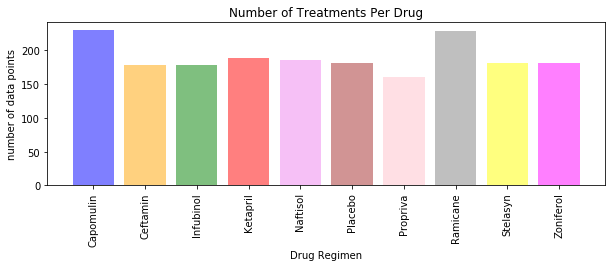

In [13]:
# using pyplot
# x_axis = np.arange(len(df))
x_axis = df.index
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 3))
plt.bar(x_axis, df["Mouse ID"], color=["blue","orange","green","red","violet","brown","pink","gray","yellow","magenta"], alpha=0.5, align="center")
plt.xticks (rotation="vertical")
plt.title("Number of Treatments Per Drug")
plt.ylabel("number of data points")
plt.xlabel("Drug Regimen")
plt.savefig("treatments.png")
plt.show()

In [14]:
# USING PANDAS method to plot

df_plot = combo[["Drug Regimen","Mouse ID"]]

# Set the index to be "State" so they will be used as labels
df_plot = df_plot.set_index("Drug Regimen")

# create groupby object to find number of data points for each treatment

df_plot = df_plot.groupby("Drug Regimen")["Mouse ID"].count()
df_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [15]:
# turn that groupby series into a dataframe to plot
df_plot = pd.DataFrame({"Drug Treatments":df_plot})
df_plot

,Drug Treatments
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


# Pandas Dataframe.plot () method for bar chart TO FIX add axis labels, legend labels

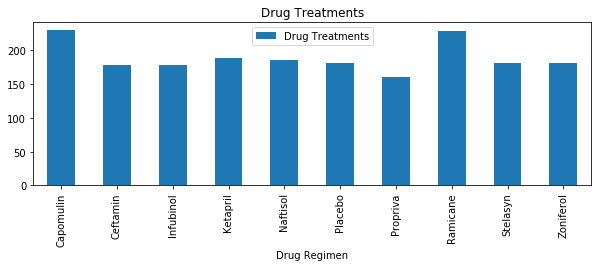

<Figure size 432x288 with 0 Axes>

In [16]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_plot.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatments")

plt.show()
plt.tight_layout()

# Two Pie Charts 

In [17]:
# specify correct columns to plot
pie = combo[["Mouse ID","Sex"]]
pie

# set index to sex so that M/F will show as labels
pie = pie.set_index("Sex")
pie

#creat groupby object to find distribution of male and female
pie = pie.groupby("Sex")["Mouse ID"].count()
pie

# turn series created by above group by back to a datafram ready to plot
pie = pd.DataFrame({"Mouse Gender":pie})
pie

,Mouse Gender
Sex,
Female,935
Male,958


## Panda DataFrame Plot Method FIX labels add title, add %?

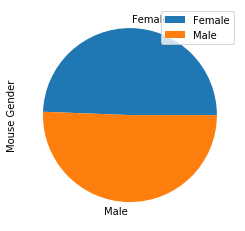

In [18]:
# show Panda DataFrame Plot ###FIX LABELS###
plot = pie.plot.pie(y="Mouse Gender")
plot

# PYPLOT, to fix add labels, legend

C:\Users\lizba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Mouse Gender in Study')

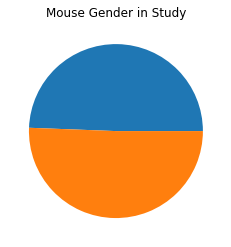

In [19]:
# now make same chart using pyplot ###SAME FIXES HERE, A START
plt.pie(pie)

plt.title("Mouse Gender in Study")

## building dataframe for next question

In [20]:
#Create a df with just the four promising drugs in it
final_four = combo[(combo['Drug Regimen'] == 'Capomulin') | (combo['Drug Regimen'] == 'Ramicane') | \
                 (combo['Drug Regimen'] == 'Infubinol') | (combo['Drug Regimen'] == 'Ceftamin')]

final_four.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [21]:
#Create a groupby object on that df for the max timepoint for each drug/mouse, and made that into a new df 
#(groupby_df)
groupby_df = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
groupby_df.head()

#convert from groupby object to df

df1 = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().to_frame().reset_index()

df1

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [22]:
#inner merge that brings together the df with the groupby_df, using the drug regimen, 
#mouse id, and timepoint as the columns to match. 

plot = pd.merge(df1, final_four, how="inner", on = ["Drug Regimen","Timepoint","Mouse ID"])
plot.head(1)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22


# Calculate the final tumor volume for each mouse in most promising treatments
## Capomulin, Ramicane, Infubinol, Ceftamin
## Calculate the IQR and quantitatively determine 
## if there are any potential outliers.

In [23]:
# find unqiue mice
mice = combo.groupby("Drug Regimen")["Mouse ID"].count()
mice

times = combo.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor Volume (mm3)"].max()
times.head(2)


Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           45.651331
             b742             45           45.000000

## Ramicane 

In [24]:
# Just results for Ramicane
Ramicane = plot.loc[(plot["Drug Regimen"] == "Ramicane")]
Ramicane.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
75,Ramicane,a411,45,38.407618,1,Male,3,22
76,Ramicane,a444,45,43.047543,0,Female,10,25
77,Ramicane,a520,45,38.810366,1,Male,13,21
78,Ramicane,a644,45,32.978522,1,Female,7,17
79,Ramicane,c458,30,38.342008,2,Female,23,20


In [25]:
#find quartlies of final tumor volume in Ramican treatment

quartiles = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ramicane treatment is: 31.56046955
The upper quartile of FTV is: 40.65900627
The interquartile range of FTV is: 9.098536719999998
The the median of FTV is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


## boxplot for Ramicine

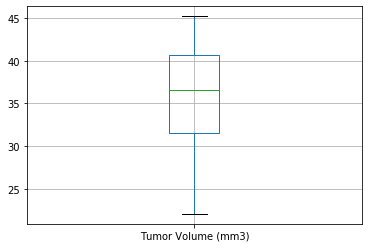

In [26]:
boxplot = Ramicane.boxplot(column=['Tumor Volume (mm3)'])


# DatFrame for just Capomulin resulst for last tumor volume, sum stats, and box plot.

In [27]:
# find results for just Capomulin
Capomulin = plot.loc[(plot['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22


In [28]:
#find quartlies of final tumor volume in Capomulin treatment

quartiles = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Capomulin treatment is: 32.37735684
The upper quartile of FTV is: 40.1592203
The interquartile range of FTV is: 7.781863460000004
The the median of FTV is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


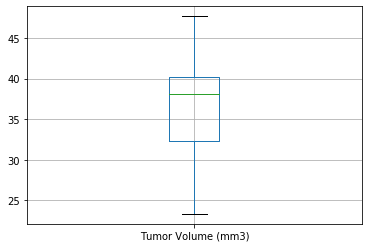

In [31]:
boxplot = Capomulin.boxplot(column=['Tumor Volume (mm3)'])

#  Infubinol results 

In [32]:
# find results for just Infubinol
Infubinol = plot.loc[(plot['Drug Regimen'] == "Infubinol")]
Infubinol.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
50,Infubinol,a203,45,67.973419,2,Female,20,23
51,Infubinol,a251,45,65.525743,1,Female,21,25
52,Infubinol,a577,30,57.031862,2,Female,6,25
53,Infubinol,a685,45,66.083066,3,Male,8,30
54,Infubinol,c139,45,72.226731,2,Male,11,28


In [33]:
quartiles = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Infubinol treatment is: 54.04860769
The upper quartile of FTV is: 65.52574285
The interquartile range of FTV is: 11.477135160000003
The the median of FTV is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


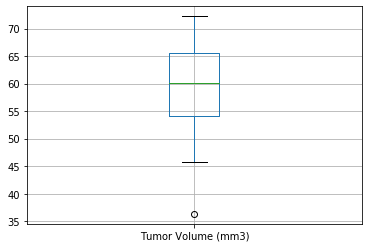

In [35]:
boxplot = Infubinol.boxplot(column=['Tumor Volume (mm3)'])

# Just Ceftamin

In [36]:
# find resulst for Ceftamin
Ceftamin = plot.loc[(plot['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
25,Ceftamin,a275,45,62.999356,3,Female,20,28
26,Ceftamin,b447,0,45.000000,0,Male,2,30
27,Ceftamin,b487,25,56.057749,1,Female,6,28
28,Ceftamin,b759,30,55.742829,1,Female,12,25
29,Ceftamin,f436,15,48.722078,2,Female,3,25


In [37]:
quartiles = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ceftamin treatment is: 48.72207785
The upper quartile of FTV is: 64.29983003
The interquartile range of FTV is: 15.577752179999997
The the median of FTV is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [ ]:
boxplot = Ceftamin.boxplot(column=['Tumor Volume (mm3)'])

## Summary BOX PLOTS on four best treatments TO FIX CLEAN UP CHART

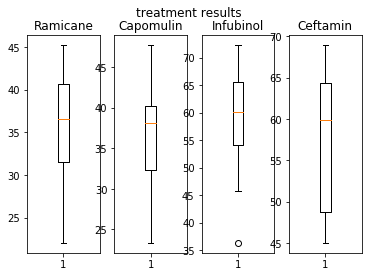

In [38]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor Volume (mm3)"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor Volume (mm3)"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor Volume (mm3)"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor Volume (mm3)"])
ax[3].set_title("Ceftamin")
plt.show()


# Capomulin Treatments

In [76]:
 #Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

 #Calculate the correlation coefficient and linear regression model between mouse weig


Cap_Treatment = combo.loc[(combo["Drug Regimen"] =="Capomulin")]


Cap_Treatment.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


## line plot of time point versus tumor volume for a single mouse treated with Capomulin.

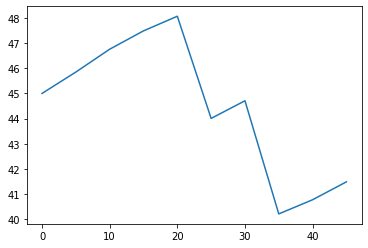

In [73]:
single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "l509")]

plt.plot(single_mouse.Timepoint,single_mouse["Tumor Volume (mm3)"])

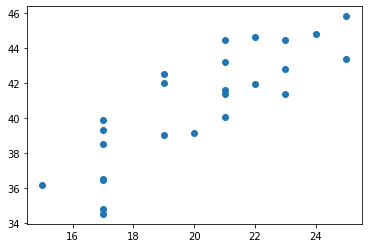

In [105]:
#I created a new dataframe using .loc to find just the mice that were treated with Capomulin.
#Then I used that dataframe to do a groupby of mouse ID. With that group by I took the mean of the weight, 
#saved that as a variable; then took the mean of the tumor volume and saved that as a variable.
#And then I used the weight variable as the X  and tumor volume variable as the Y for plotting.

weight = Cap_Treatment.groupby("Mouse ID")["Weight (g)"].mean()
weight.head(40)

mean_tum = Cap_Treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_tum.head(30)


#ax1 = to_plot.plot.scatter(x='weight',
                       #y='mean_tum',
                       #c='DarkBlue')
#ax1

plt.scatter(weight,mean_tum)
plt.show()


In [151]:
new_df = pd.DataFrame({"Weight":weight,"mean_tum":mean_tum})
new_df

#len("mean_tum")
new_df.shape


(25, 2)

 # Generate a scatter plot 
    

    
    




In [ ]:
#Calculate the correlation coefficient and linear regression model between mouse weig


* Calculate the correlation coefficient and linear regression model 
between mouse weight and average tumor volume for the Capomulin treatment. 
Plot the linear regression model on top of the previous scatter plot.

In [117]:
correlation = st.pearsonr("Weight","mean_tum")


ValueError: x and y must have the same length.

In [124]:
('weight')

NameError: name 'shape' is not defined

In [113]:
x_values = ('weight')
y_values = ('mean_tum')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

TypeError: len() of unsized object